In [1]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#imports for user defined functions
from env import host, user, password, get_db_url
import wrangle as wr

# Imports for arithmetic calculations and data frame manipulation
import math
import numpy as np
import pandas as pd

#Imports for statistical analysis
from scipy import stats
import statistics

#Imports for creating visualizations
import matplotlib.pyplot as plt 
import seaborn as sns


## Acquire Data

In [2]:
# SQL query to acquire data

query = '''
SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips FROM properties_2017 
JOIN propertylandusetype 
USING (propertylandusetypeid)
WHERE propertylandusetypeid = 261;
'''

df = pd.read_sql(query, get_db_url('zillow'))
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [4]:
#Cache a local csv file
df.to_csv('zillow_raw.csv', index=False)


In [5]:
zillow = pd.read_csv('zillow_raw.csv')
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


## Clean/Prep Data

In [6]:
# Summarizing data 
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [7]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [8]:
# Renaming columns for clarity

zillow = zillow.rename(columns = {'bedroomcnt': 'bedrooms', 'bathroomcnt': 'bathrooms', 
                                  'calculatedfinishedsquarefeet': 'sqft', 'taxvaluedollarcnt': 'tax_value', 
                                  'yearbuilt': 'year_built', 'taxamount': 'tax_amount'})
zillow.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


### Dealing with null values

In [9]:
#checking for nulls
zillow.isnull().sum()

bedrooms        11
bathrooms       11
sqft          8484
tax_value      493
year_built    9337
tax_amount    4442
fips             0
dtype: int64

In [10]:
#Calculate total number of nulls
zillow.isnull().sum().sum()

22778

In [11]:
#how large is our data set?
zillow.shape

(2152863, 7)

In [12]:
zillow.isnull().sum().sum()/len(zillow)

0.01058032954256727

Since the null values only make up about 1% of our data I will drop all the null values. 

In [13]:
zillow = zillow.dropna()

In [14]:
#confirm we have no nulls
zillow.isnull().any()

bedrooms      False
bathrooms     False
sqft          False
tax_value     False
year_built    False
tax_amount    False
fips          False
dtype: bool

In [15]:
#check new size of data
zillow.shape

(2140235, 7)

### Change data type

In [16]:
#change all data types to int64
zillow = zillow.astype('int')
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype
---  ------      -----
 0   bedrooms    int64
 1   bathrooms   int64
 2   sqft        int64
 3   tax_value   int64
 4   year_built  int64
 5   tax_amount  int64
 6   fips        int64
dtypes: int64(7)
memory usage: 130.6 MB


### Visualize distributions and search for outliers/skewness

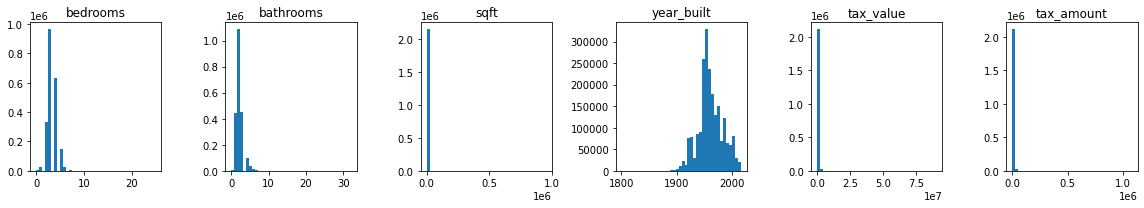

In [17]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'sqft', 'year_built', 'tax_value', 'tax_amount']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, 6, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillow[col].hist(bins=40)

    # Hide gridlines.
    plt.grid(False)
    
    #get rid of overlapping plots
    plt.tight_layout()


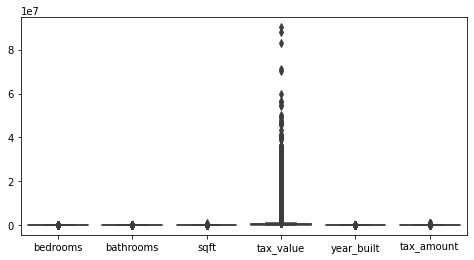

In [18]:
plt.figure(figsize=(8,4))

# Create boxplots for all but fips.
sns.boxplot(data=zillow.drop(columns=['fips']))
plt.show()

Takeways: 
- Each varibale has outliers skewing the data

### Test wrangle.py

In [19]:
df = wr.wrangle_zillow()
df.info()

Using cached csv...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column      Dtype
---  ------      -----
 0   bedrooms    int64
 1   bathrooms   int64
 2   sqft        int64
 3   tax_value   int64
 4   year_built  int64
 5   tax_amount  int64
 6   fips        int64
dtypes: int64(7)
memory usage: 130.6 MB
